## ADAM AZMAN 210962008 LAB 4

1. Consider the  Table Contains the Average Annual Gold Rate from 1965 – 2022. Gold prices fluctuated throughout the year 2020 because of the COVID-19 epidemic. With gold functioning as a safe haven for investors, demand for the precious metal grew, and its price followed suit. During the epidemic, the stock market weakened, but it began to recover by the end of 2020 when the price of gold fell slightly.
It’s crucial to remember that gold prices fluctuate during the year, and the figure below represents the average price for that year.
With the exception of a few lows shared across a few years, The table shows that the gold price trend has always been upward, supporting the claim that gold is a secure investment over extended periods of time.
Write a python program to find the fitted simple linear regression equation for the given data. 
Compare the coefficients obtained from sklearn model with your program. Compute the error, MSE and RMSE. Predict the gold price with the year 2025 for 1 gram.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
data = pd.read_csv('gold_prices.csv')
years = data['Year'].values
price = data['Price'].values

n = len(years)

sum_xy = np.sum(years * price)
sum_x = np.sum(years)
sum_y = np.sum(price)
sum_x_squared = np.sum(years**2)
b_manual = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
a_manual = (sum_y - b_manual * sum_x) / n

yhat_manual = a_manual + b_manual * years
mse_manual = np.mean((price - yhat_manual)**2)
rmse_manual = np.sqrt(mse_manual)




In [24]:
model = LinearRegression()
model.fit(years.reshape(-1, 1), price)
yhat_sklearn = model.predict(years.reshape(-1, 1))
mse_sklearn = mean_squared_error(price, yhat_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)

In [25]:

prediction_manual = a_manual + b_manual * 2025
prediction_sklearn = model.predict([[2025]])

print("Manual Coefficients:")
print("a:", a_manual)
print("b:", b_manual)
print("\nManual MSE and RMSE:", mse_manual, rmse_manual)
print("\nSklearn MSE and RMSE:", mse_sklearn, rmse_sklearn)
print("\nPredicted Price for 2025 (Manual):", prediction_manual)
print("Predicted Price for 2025 (Sklearn):", prediction_sklearn[0])


Manual Coefficients:
a: -1336226.704266511
b: 675.343658679135

Manual MSE and RMSE: 62644360.72375505 7914.819058181623

Sklearn MSE and RMSE: 62644360.72375514 7914.81905818163

Predicted Price for 2025 (Manual): 31344.204558737576
Predicted Price for 2025 (Sklearn): 31344.204558737576


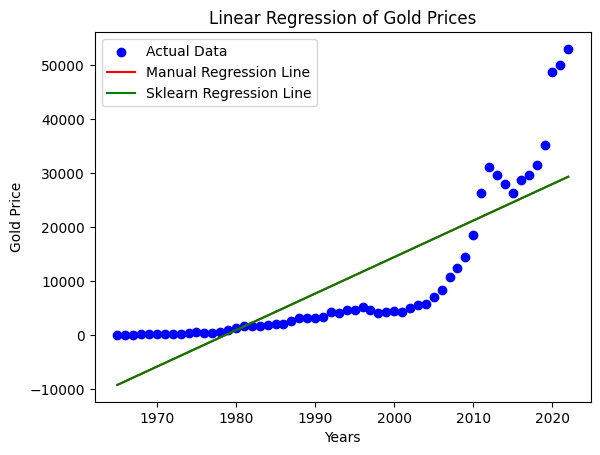

In [26]:
plt.scatter(years, price, color='blue', label='Actual Data')
plt.plot(years, yhat_manual, color='red', label='Manual Regression Line')
plt.plot(years, yhat_sklearn, color='green', label='Sklearn Regression Line')
plt.xlabel('Years')
plt.ylabel('Gold Price')
plt.title('Linear Regression of Gold Prices')
plt.legend()
plt.show()

2. Consider the Question no 1 gold price with following year-wise silver price. Write a python program to find the fitted multiple linear regression equation for the given data.  Compare the coefficients obtained from sklearn model with your program. Compute the error, MSE and RMSE. Predict the gold and silver price with the year 2024 for 1 gram.


In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data = pd.read_csv('silver_prices.csv')
years = data['Year'].values
x1 = data['gprice'].values
x2 = data['sprice'].values
n = len(years)

numerator = np.sum(x2**2) * np.sum(x1 * years) - np.sum(x1 * x2) * np.sum(x2 * years)
denominator = np.sum(x1**2) * np.sum(x2**2) - np.sum(x1 * x2)**2

b1_manual = numerator / denominator

b2_numerator = np.sum(x2 **2) * np.sum(x2 * years) - np.sum(x1*x2) * np.sum(x1 * years)
b2_manual = b2_numerator / denominator

print("Manual Coefficients:")
print("b1:", b1_manual)
print("b2:", b2_manual)


X = data[['Year', 'sprice']]
y = data['gprice']

model = LinearRegression()
model.fit(X, y)

b1_sklearn, b2_sklearn = model.coef_

print("\nSklearn Coefficients:")
print("b1:", b1_sklearn)
print("b2:", b2_sklearn)

y_pred_manual = b1_manual * x1 + b2_manual * x2
mse_manual = mean_squared_error(y, y_pred_manual)
rmse_manual = np.sqrt(mse_manual)

y_pred_sklearn = model.predict(X)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)

print("\nManual MSE and RMSE:", mse_manual, rmse_manual)
print("Sklearn MSE and RMSE:", mse_sklearn, rmse_sklearn)


year_2024 = 2024
silver_price_2024 = 30  

gold_price_pred_manual = b1_manual * year_2024 + b2_manual * silver_price_2024
gold_price_pred_sklearn = model.predict([[year_2024, silver_price_2024]])

print("\nPredicted Gold Price for 2024 (Manual):", gold_price_pred_manual)
print("Predicted Gold Price for 2024 (Sklearn):", gold_price_pred_sklearn[0])


Manual Coefficients:
b1: -0.23320927484203907
b2: -1.1288308306221138

Sklearn Coefficients:
b1: 181.22245448212772
b2: 0.6242174532686107

Manual MSE and RMSE: 3168256189.603087 56287.26489716024
Sklearn MSE and RMSE: 15467100.41490188 3932.8234660230914

Predicted Gold Price for 2024 (Manual): -505.8804971989505
Predicted Gold Price for 2024 (Sklearn): 5103.121979766234


/tmp/ipykernel_3694/2067645806.py:13: RuntimeWarning: overflow encountered in scalar multiply
  numerator = np.sum(x2**2) * np.sum(x1 * years) - np.sum(x1 * x2) * np.sum(x2 * years)
/tmp/ipykernel_3694/2067645806.py:14: RuntimeWarning: overflow encountered in scalar multiply
  denominator = np.sum(x1**2) * np.sum(x2**2) - np.sum(x1 * x2)**2
/tmp/ipykernel_3694/2067645806.py:14: RuntimeWarning: overflow encountered in scalar subtract
  denominator = np.sum(x1**2) * np.sum(x2**2) - np.sum(x1 * x2)**2
/tmp/ipykernel_3694/2067645806.py:18: RuntimeWarning: overflow encountered in scalar multiply
  b2_numerator = np.sum(x2 **2) * np.sum(x2 * years) - np.sum(x1*x2) * np.sum(x1 * years)
/home/adam/.local/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('silver_prices.csv')
years = data['Year'].values
gold_price = data['gprice'].values
silver_price = data['sprice'].values
n = len(years)

sum_xy = np.sum(years * gold_price)
sum_x = np.sum(years)
sum_y = np.sum(gold_price)
sum_x_squared = np.sum(years**2)
b_manual = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
a_manual = (sum_y - b_manual * sum_x) / n

print("Manual Coefficients:")
print("a:", a_manual)
print("b:", b_manual)

X = years.reshape(-1, 1)
y = gold_price

model = LinearRegression()
model.fit(X, y)

a_sklearn = model.intercept_
b_sklearn = model.coef_[0]

print("\nSklearn Coefficients:")
print("a:", a_sklearn)
print("b:", b_sklearn)

y_pred_manual = a_manual + b_manual * years
mse_manual = mean_squared_error(gold_price, y_pred_manual)
rmse_manual = np.sqrt(mse_manual)

y_pred_sklearn = model.predict(X)
mse_sklearn = mean_squared_error(gold_price, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)

print("\nManual MSE and RMSE:", mse_manual, rmse_manual)
print("Sklearn MSE and RMSE:", mse_sklearn, rmse_sklearn)


year_2025 = 2025
year_2024 = 2024
gold_price_pred_manual_2025 = a_manual + b_manual * year_2025
gold_price_pred_sklearn_2025 = model.predict([[year_2025]])

gold_price_pred_manual_2024 = a_manual + b_manual * year_2024
silver_price_pred_manual_2024 = a_manual + b_manual * year_2024
gold_price_pred_sklearn_2024 = model.predict([[year_2024]])

print("\nPredicted Gold Price for 2025 (Manual):", gold_price_pred_manual_2025)
print("Predicted Gold Price for 2025 (Sklearn):", gold_price_pred_sklearn_2025[0])
print("Predicted Gold Price for 2024 (Manual):", gold_price_pred_manual_2024)
print("Predicted Silver Price for 2024 (Manual):", silver_price_pred_manual_2024)

# SGD parameters
learning_rate = 0.01
num_epochs = 1000
batch_size = 32

a_sgd = 0.0
b_sgd = 0.0


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Manual SGD algorithm
for epoch in range(num_epochs):
    for i in range(0, n, batch_size):
        x_batch = X_scaled[i:i + batch_size]
        y_batch = gold_price[i:i + batch_size]

        for j in range(len(x_batch)):
            y_pred = a_sgd + b_sgd * x_batch[j]
            error = y_batch[j] - y_pred

            a_sgd += learning_rate * error
            b_sgd += learning_rate * error * x_batch[j]

# Compute errors, MSE, and RMSE for SGD
y_pred_sgd = a_sgd + b_sgd * years
mse_sgd = mean_squared_error(gold_price, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)

print("\nSGD MSE and RMSE:", mse_sgd, rmse_sgd)

# Predict for the year 2024 using SGD
gold_price_pred_sgd_2024 = a_sgd + b_sgd * year_2024

print("Predicted Gold Price for 2024 (SGD):", gold_price_pred_sgd_2024)


Manual Coefficients:
a: -2084019.9875212705
b: 1048.101774572563

Sklearn Coefficients:
a: -2084019.987521271
b: 1048.1017745725633

Manual MSE and RMSE: 52366665.82516636 7236.48159157241
Sklearn MSE and RMSE: 52366665.82516636 7236.48159157241

Predicted Gold Price for 2025 (Manual): 38386.10598816979
Predicted Gold Price for 2025 (Sklearn): 38386.10598816979
Predicted Gold Price for 2024 (Manual): 37338.00421359693
Predicted Silver Price for 2024 (Manual): 37338.00421359693

SGD MSE and RMSE: 557002359076772.94 23600897.42100442
Predicted Gold Price for 2024 (SGD): [23879600.61028145]
